#### Brenna Manning and Emily Wang | Change the World : Drug Abuse and Health | Data Science 2016

March 4, 2016

## Next Steps of Our Project

Goals:
* Explore more aspects of our data
* Create clearer visualizations

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


We want to explore more features of our data to learn more about the axes of diversity we were initially interested in.  

We also want to modify the presentation of our visualizations from the previous notebook to make them clearer and more impactful.

#### Load data

[Here's the link to the dataset webpage.](http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/34933)

In [3]:
df = pd.read_table('data/ICPSR_34933/DS0001/34933-0001-Data.tsv')

In [57]:
df_subset = df[df['ALCLSACT'] < 3]


In [40]:
def mental_health_bars_activity(df, act, emotion, substancestr, emotionstr):
    """
   
    df: dataframe of interest

    act: whether respondant sacrificed important activities, such as taking care of children, 
    taking care of themselves, or working for a substance
    emotion: mental health aspect of interest

    for the sake of plot labelling:
    substance: human readable string of the substance
    emotionstr: human readable string of the mental health aspect
    """
    
   
    df_subset = df[df[act] < 3]
    
    # 
    df_subset= df_subset[df_subset[emotion] < 6]
    df_subset['BRACKET'] = df_subset[act]
    df_subset['EMOBRACKET'] = df_subset[emotion]
    
    df_subset.loc[df_subset[emotion] >= 5, 'EMOBRACKET'] = emotionstr +' Never'     
    df_subset.loc[df_subset[emotion] < 5, 'EMOBRACKET'] = emotionstr + ' Some or Little'
    df_subset.loc[df_subset[emotion] < 3, 'EMOBRACKET'] = emotionstr + ' Most or All'
    
   
    grouped = df_subset.groupby('BRACKET')
    bracket_counts = grouped['EMOBRACKET'].value_counts(normalize=True)
    display(bracket_counts)
        
    bracket_data = [{'BRACKET': br, 'EMOBRACKET': em, 'percentage': percentage*100}
                    for (br, em), percentage in dict(bracket_counts).items()
                   ]
    
    plotting_df = pd.DataFrame(bracket_data)
    display(plotting_df)
    
    
    p, ax = plt.subplots()
    #_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    hue_order_list = [emotionstr + ' Most or All' , emotionstr + ' Some or Little', emotionstr + ' Never']
    p = sns.barplot(x="BRACKET", y="percentage", hue="EMOBRACKET", hue_order=hue_order_list, data=plotting_df)
    ax.set_xticklabels(['yes', 'no'])
    xlabel = 'Gave up or spent less time on important activities'
    plt.xlabel(xlabel)
    plt.ylabel('Percentage of Respondents in Frequency Bracket')
    title =  'Sacrificed Important Activities due to ' + substancestr
    plt.title(title)
    plt.show()
    
    return


In [53]:
def sacrificed_activities(df, act,  substancestr,  used_ever):
    """
    Shows plot of how many respondants who have used the substance make these sacrifices for the substance.
    df: dataframe of interest
    act: whether respondant sacrificed important activities, such as taking care of children, 
    taking care of themselves, or working for a substance
    emotion: mental health aspect of interest
    for the sake of plot labelling:
    substance: human readable string of the substance
    emotionstr: human readable string of the mental health aspect
    """     
   
    df_subset = df[df[act]< 3]
    df_subset['BRACKET'] = df_subset[act]    
    df_substance_subset = df_subset[df_subset[used_ever] == 1]
    yvals = df_substance_subset['BRACKET'].value_counts()
    sns.pointplot(x=[0,1], y=yvals)
    point_plot_title = '# Of Respondants Reporting Sacrificing Important Activites For ' + substancestr 
    plt.title(point_plot_title)
    return
    

BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.485670
         Hopelessness Never             0.379551
         Hopelessness Most or All       0.134779
2        Hopelessness Never             0.663388
         Hopelessness Some or Little    0.294421
         Hopelessness Most or All       0.042191
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,13.477924
1,2,Hopelessness Most or All,4.219133
2,1,Hopelessness Never,37.955074
3,2,Hopelessness Some or Little,29.442113
4,1,Hopelessness Some or Little,48.567002
5,2,Hopelessness Never,66.338755


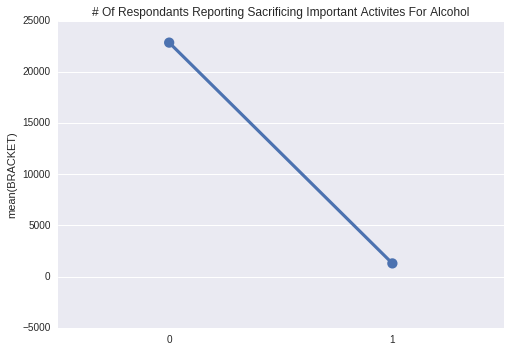

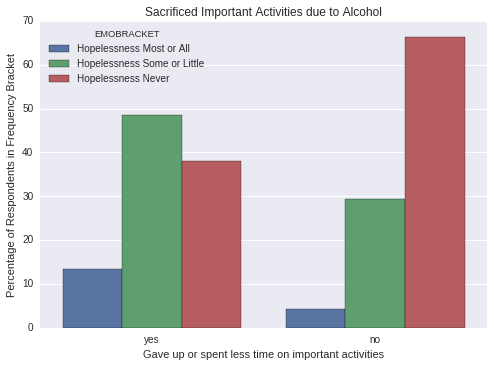

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.653014
         Nervousness Never             0.175425
         Nervousness Most or All       0.171561
2        Nervousness Some or Little    0.596641
         Nervousness Never             0.344968
         Nervousness Most or All       0.058391
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,34.496785
1,2,Nervousness Some or Little,59.664086
2,1,Nervousness Most or All,17.156105
3,1,Nervousness Some or Little,65.301391
4,1,Nervousness Never,17.542504
5,2,Nervousness Most or All,5.839129


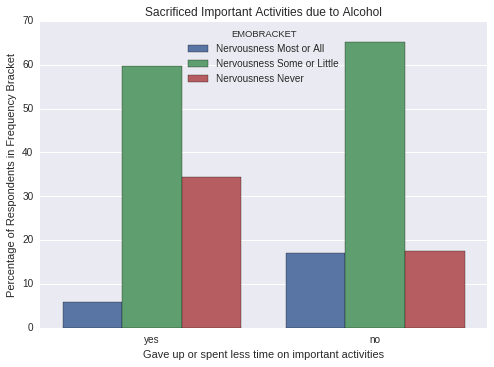

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.585008
         Restlessness Never             0.225657
         Restlessness Most or All       0.189335
2        Restlessness Some or Little    0.491190
         Restlessness Never             0.440607
         Restlessness Most or All       0.068203
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,58.500773
1,2,Restlessness Never,44.060683
2,1,Restlessness Most or All,18.933539
3,2,Restlessness Most or All,6.820268
4,1,Restlessness Never,22.565688
5,2,Restlessness Some or Little,49.119049


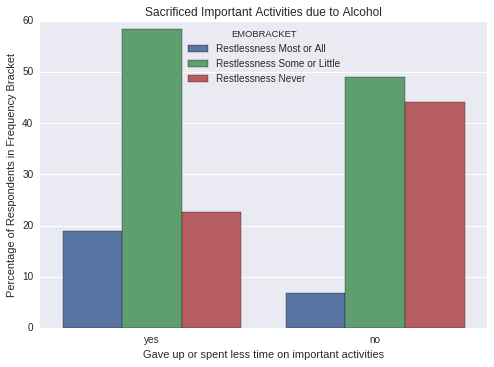

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.490347
         Depression Never             0.378378
         Depression Most or All       0.131274
2        Depression Never             0.678192
         Depression Some or Little    0.282161
         Depression Most or All       0.039647
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,37.837838
1,2,Depression Most or All,3.964681
2,1,Depression Some or Little,49.034749
3,2,Depression Never,67.819207
4,2,Depression Some or Little,28.216112
5,1,Depression Most or All,13.127413


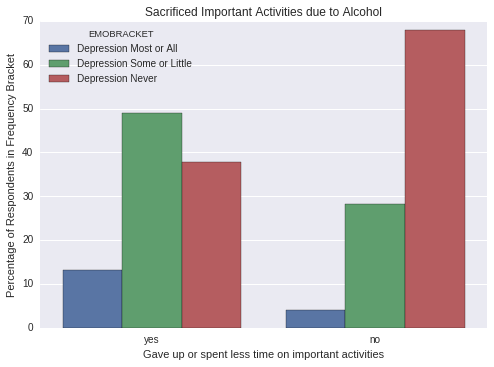

In [50]:
sacrificed_activities(df, 'ALCLSACT',  'Alcohol', 'ALCEVER')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTHOP30', 'Alcohol', 'Hopelessness')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTNRV30', 'Alcohol', 'Nervousness')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTRST30', 'Alcohol', 'Restlessness')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTCHR30', 'Alcohol', 'Depression')

BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.510708
         Hopelessness Never             0.332784
         Hopelessness Most or All       0.156507
2        Hopelessness Never             0.556651
         Hopelessness Some or Little    0.366326
         Hopelessness Most or All       0.077023
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,15.650741
1,2,Hopelessness Most or All,7.702326
2,1,Hopelessness Never,33.278418
3,2,Hopelessness Some or Little,36.632558
4,1,Hopelessness Some or Little,51.070840
5,2,Hopelessness Never,55.665116


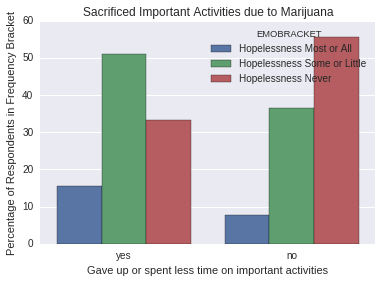

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.652389
         Nervousness Most or All       0.176277
         Nervousness Never             0.171334
2        Nervousness Some or Little    0.601823
         Nervousness Never             0.303515
         Nervousness Most or All       0.094662
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,30.351497
1,2,Nervousness Some or Little,60.182258
2,1,Nervousness Most or All,17.627677
3,1,Nervousness Some or Little,65.238880
4,1,Nervousness Never,17.133443
5,2,Nervousness Most or All,9.466245


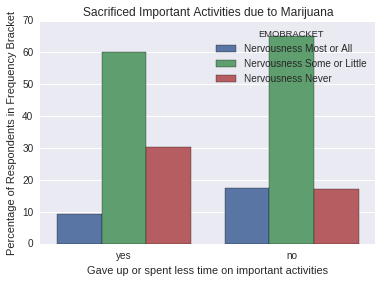

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.564145
         Restlessness Never             0.220395
         Restlessness Most or All       0.215461
2        Restlessness Some or Little    0.522402
         Restlessness Never             0.359918
         Restlessness Most or All       0.117680
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,56.414474
1,2,Restlessness Never,35.991820
2,1,Restlessness Most or All,21.546053
3,2,Restlessness Most or All,11.767987
4,1,Restlessness Never,22.039474
5,2,Restlessness Some or Little,52.240193


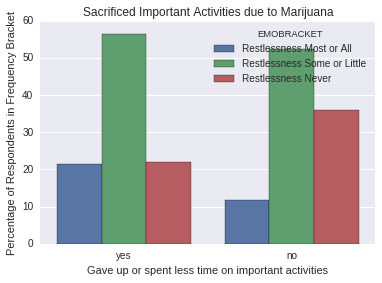

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.480263
         Depression Never             0.365132
         Depression Most or All       0.154605
2        Depression Never             0.559502
         Depression Some or Little    0.366307
         Depression Most or All       0.074191
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,36.513158
1,2,Depression Most or All,7.419115
2,1,Depression Some or Little,48.026316
3,2,Depression Never,55.950167
4,2,Depression Some or Little,36.630718
5,1,Depression Most or All,15.460526


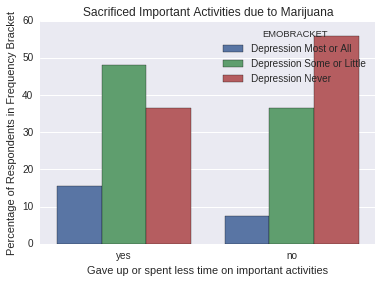

In [40]:
mental_health_bars_activity(df, 'MRJLSACT', 'DSTHOP30', 'Marijuana', 'Hopelessness')
mental_health_bars_activity(df, 'MRJLSACT', 'DSTNRV30', 'Marijuana', 'Nervousness')
mental_health_bars_activity(df, 'MRJLSACT', 'DSTRST30', 'Marijuana', 'Restlessness')
mental_health_bars_activity(df, 'MRJLSACT', 'DSTCHR30', 'Marijuana', 'Depression')


/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.476190
         Hopelessness Most or All       0.269841
         Hopelessness Never             0.253968
2        Hopelessness Never             0.500000
         Hopelessness Some or Little    0.395161
         Hopelessness Most or All       0.104839
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,26.984127
1,2,Hopelessness Most or All,10.483871
2,1,Hopelessness Never,25.396825
3,2,Hopelessness Some or Little,39.516129
4,1,Hopelessness Some or Little,47.619048
5,2,Hopelessness Never,50.000000


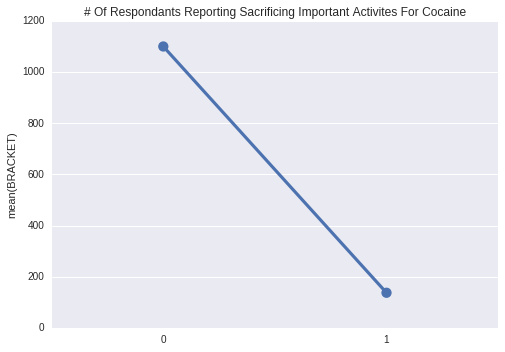

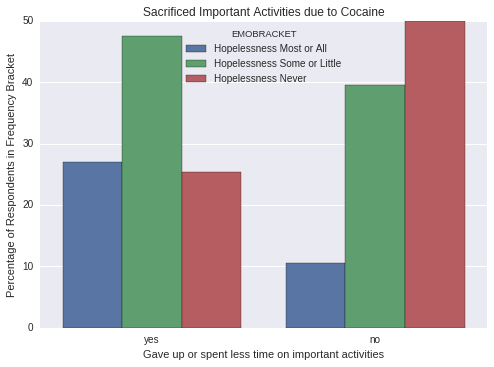

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.507937
         Nervousness Most or All       0.293651
         Nervousness Never             0.198413
2        Nervousness Some or Little    0.608871
         Nervousness Never             0.263105
         Nervousness Most or All       0.128024
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,26.310484
1,2,Nervousness Some or Little,60.887097
2,1,Nervousness Most or All,29.365079
3,1,Nervousness Some or Little,50.793651
4,1,Nervousness Never,19.841270
5,2,Nervousness Most or All,12.802419


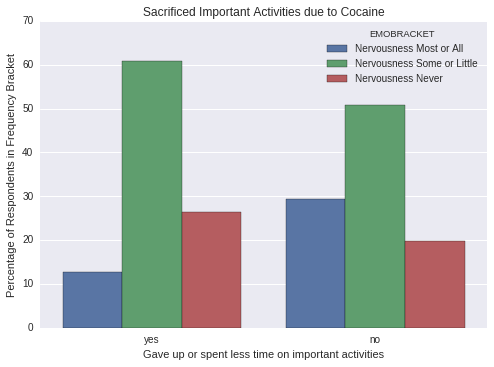

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.539683
         Restlessness Most or All       0.293651
         Restlessness Never             0.166667
2        Restlessness Some or Little    0.570997
         Restlessness Never             0.289023
         Restlessness Most or All       0.139980
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,53.968254
1,2,Restlessness Never,28.902316
2,1,Restlessness Most or All,29.365079
3,2,Restlessness Most or All,13.997986
4,1,Restlessness Never,16.666667
5,2,Restlessness Some or Little,57.099698


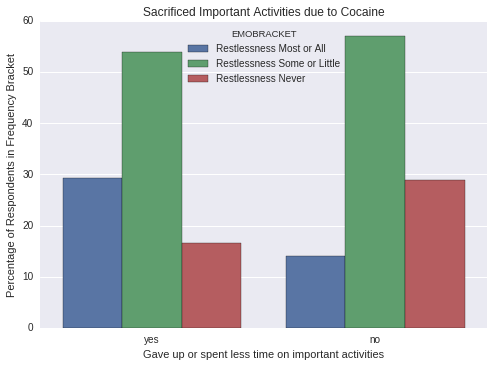

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.531746
         Depression Most or All       0.253968
         Depression Never             0.214286
2        Depression Never             0.499496
         Depression Some or Little    0.416918
         Depression Most or All       0.083585
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,21.428571
1,2,Depression Most or All,8.358510
2,1,Depression Some or Little,53.174603
3,2,Depression Never,49.949648
4,2,Depression Some or Little,41.691843
5,1,Depression Most or All,25.396825


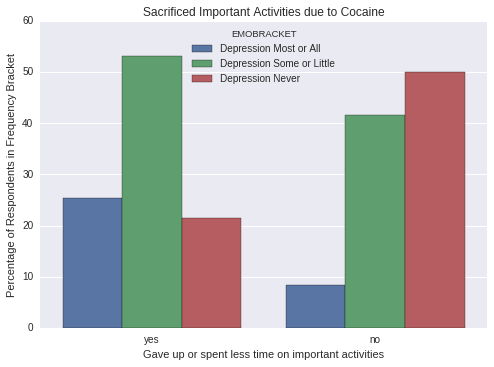

In [54]:
sacrificed_activities(df, 'COCLSACT', 'Cocaine', 'COCEVER' )
mental_health_bars_activity(df, 'COCLSACT', 'DSTHOP30', 'Cocaine', 'Hopelessness')
mental_health_bars_activity(df, 'COCLSACT', 'DSTNRV30', 'Cocaine', 'Nervousness')
mental_health_bars_activity(df, 'COCLSACT', 'DSTRST30', 'Cocaine', 'Restlessness')
mental_health_bars_activity(df, 'COCLSACT', 'DSTCHR30', 'Cocaine', 'Depression')

/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.476190
         Hopelessness Most or All       0.304762
         Hopelessness Never             0.219048
2        Hopelessness Some or Little    0.504950
         Hopelessness Never             0.336634
         Hopelessness Most or All       0.158416
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,30.476190
1,2,Hopelessness Most or All,15.841584
2,1,Hopelessness Never,21.904762
3,2,Hopelessness Some or Little,50.495050
4,1,Hopelessness Some or Little,47.619048
5,2,Hopelessness Never,33.663366


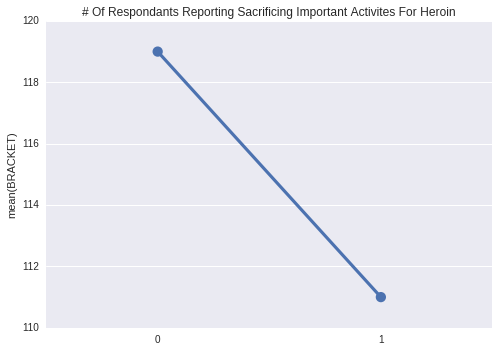

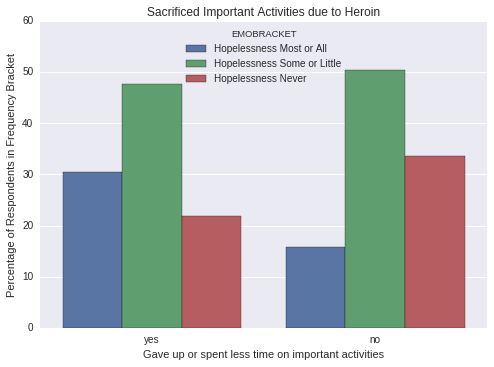

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.638095
         Nervousness Most or All       0.238095
         Nervousness Never             0.123810
2        Nervousness Some or Little    0.623762
         Nervousness Never             0.198020
         Nervousness Most or All       0.178218
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,19.801980
1,2,Nervousness Some or Little,62.376238
2,1,Nervousness Most or All,23.809524
3,1,Nervousness Some or Little,63.809524
4,1,Nervousness Never,12.380952
5,2,Nervousness Most or All,17.821782


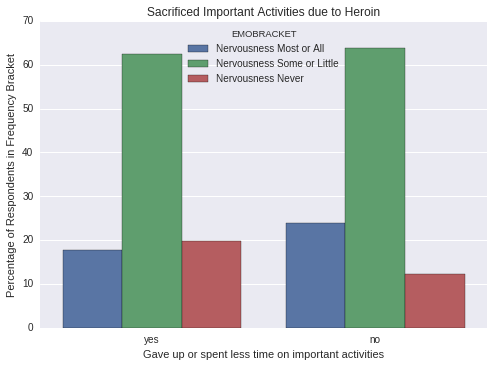

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.580952
         Restlessness Most or All       0.295238
         Restlessness Never             0.123810
2        Restlessness Some or Little    0.534653
         Restlessness Most or All       0.257426
         Restlessness Never             0.207921
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,58.095238
1,2,Restlessness Never,20.792079
2,1,Restlessness Most or All,29.523810
3,2,Restlessness Most or All,25.742574
4,1,Restlessness Never,12.380952
5,2,Restlessness Some or Little,53.465347


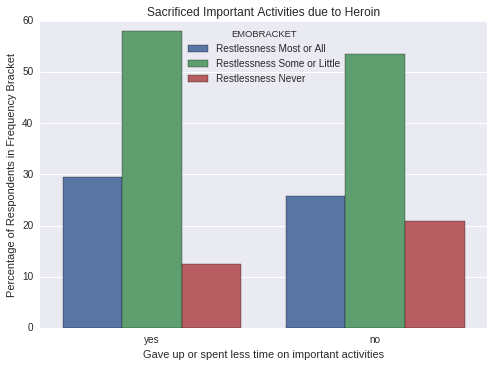

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.523810
         Depression Most or All       0.247619
         Depression Never             0.228571
2        Depression Some or Little    0.485149
         Depression Never             0.356436
         Depression Most or All       0.158416
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,22.857143
1,2,Depression Most or All,15.841584
2,1,Depression Some or Little,52.380952
3,2,Depression Never,35.643564
4,2,Depression Some or Little,48.514851
5,1,Depression Most or All,24.761905


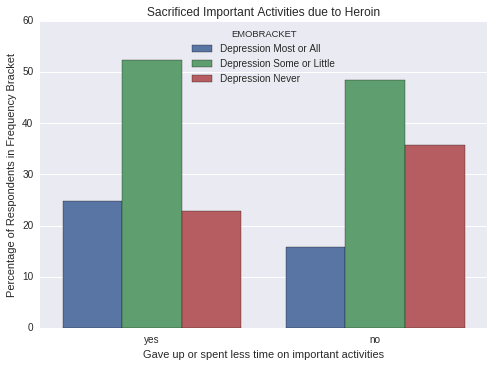

In [55]:
sacrificed_activities(df, 'HERLSACT', 'Heroin', 'HEREVER' )
mental_health_bars_activity(df, 'HERLSACT', 'DSTHOP30', 'Heroin', 'Hopelessness')
mental_health_bars_activity(df, 'HERLSACT', 'DSTNRV30', 'Heroin', 'Nervousness')
mental_health_bars_activity(df, 'HERLSACT', 'DSTRST30', 'Heroin', 'Restlessness')
mental_health_bars_activity(df, 'HERLSACT', 'DSTCHR30', 'Heroin', 'Depression')